In [89]:
# I'm going to add some columns with car properties
train_file = "train_data.csv"
test_file = "test_data.csv"
sample_submission = "sample_submission.csv"
import pandas as pd
import numpy as np

In [645]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
train_data["Complectation"] = train_data["Complectation"].apply(lambda x: x.replace("?", '').replace(",", '.').strip())
test_data["Complectation"] = test_data["Complectation"].apply(lambda x: x.replace("?", '').replace(",", '.').strip())

In [646]:
columns = list(train_data)
ycolumns = [c for c in columns if c.startswith('X')]
xcolumns = [c for c in columns if not c.startswith('X')]

In [647]:
#pd.read_csv(sample_submission)

In [648]:
train_data[ycolumns].sum(1).describe() # 18 чисел в интервале от 0 до 1, в сумме не дают 1 

count    1676.000000
mean        8.827051
std         1.325852
min         4.484360
25%         7.939615
50%         8.753630
75%         9.660220
max        14.926793
dtype: float64

In [649]:
train_data.head() 
# если по-хорошему, то надо учитывать бренд, модель и комплектацию, 
# но в простом варианте будем смотреть только на бренд и особенности человека

,Brand,Model,Complectation,C,P1,P2,P3,P4,P5,P6,...,X10,X11,X12,X13,X14,X15,X16,X17,X18,Photo_filename
0,Toyota,Highlander,Toyota Highlander New 3.5 Elegance,2,3,3,3,3,2,1,...,0.506242,0.646070,0.496397,0.482742,0.519546,0.363006,0.541016,0.478539,0.482166,photos/Toyota/Highlander-elegance-070.png
1,BMW,5 Series Sedan,BMW 5 Series Sedan 540i xDrive,2,2,2,2,4,1,1,...,0.691734,0.418310,0.644495,0.341387,0.525428,0.840987,0.627297,0.405951,0.649367,photos/BMW/5_540i-xDrive_P0300(FZBTQ).jpg
2,Hyundai,Santa Fe Premium,Hyundai Santa Fe Premium Comfort 2.4 AT,1,1,2,1,2,1,1,...,0.918261,0.532597,0.575651,0.493465,0.495388,0.307278,0.473211,0.838744,0.867956,photos/Hyundai/Hyundai-SANTA FE-32-80.png
3,BMW,5 Series Sedan,BMW 5 Series Sedan 520i,2,3,3,3,3,1,1,...,0.635884,0.414786,0.353809,0.322471,0.446515,0.785099,0.679779,0.753667,0.306496,photos/BMW/5_520i_P0300(FLCEW).jpg
4,Volvo,XC90,Volvo XC90 T6 AT 5S Momentum,1,1,3,2,3,1,2,...,0.843366,0.126928,0.380268,0.148491,0.333521,0.245096,0.165287,0.856968,0.506990,photos/Volvo/XC90_R-Design_614(RC00)_9qDsh.jpg


In [650]:
data.head()

,Brand,Model,Complectation,engine,gearbox,Тип кузова,hp (лошадиные силы),коробка передач,Привод,engine_type
0,Audi,A3 Sedan,Audi A3 Sedan 1.4 TFSI 7AMT,TFSI,AMT,Sedan,150,7.0,передний,1.4
1,Audi,A3 Sedan,Audi A3 Sedan 2.0 TFSI 7AMT quattro,TFSI,AMT,Sedan,190,7.0,полный,2.0
2,Audi,A3 Sedan,Audi A3 Sedan sport 1.4 TFSI 7AMT,TFSI,AMT,Sedan,150,7.0,передний,1.4
3,Audi,A3 Sportback,Audi A3 Sportback 1.4 TFSI 7AMT,TFSI,AMT,Sportback,150,7.0,передний,1.4
4,Audi,A3 Sportback,Audi A3 Sportback 2.0 TFSI 7AMT quattro,TFSI,AMT,Sportback,190,7.0,полный,2.0


In [651]:
data = pd.read_csv("car_params-8.csv", sep=";")
data['Complectation'] = data['Complectation'].apply(lambda x: x.replace('?', '').replace(",", '.').strip())
data.drop_duplicates(inplace=True)
data_columns = "Brand,Model,Complectation,engine,Тип кузова,hp (лошадиные силы),Страна-производитель,коробка передач,engine_type,Привод".split(',')
params = {}
for i, r in data[data_columns].iterrows():
    c = r["Complectation"]
    params[c] = (r["Тип кузова"], r['engine'], 
                 r['hp (лошадиные силы)'], r['коробка передач'],
                 r['engine_type'],r['Привод'])

In [652]:
merged_train = train_data.join(data.set_index(
    ["Brand", "Model", "Complectation"]), on=["Brand", "Model", "Complectation"])

merged_train[merged_train["engine"].isnull()]
merged_train.shape

(1676, 38)

In [653]:
merged_test = test_data.join(data.set_index(
    ["Brand", "Model", "Complectation"]), on=["Brand", "Model", "Complectation"])
merged_test[merged_test["engine"].isnull()]
merged_test.shape

(700, 21)

In [654]:
#train_data.set_index("Complectation").join(data.set_index("Complectation"), on="Complectation")
#list(train_data["Complectation"])

In [655]:

train_data = merged_train
test_data = merged_test
xlabels = xcolumns[3:-1]

In [656]:
merged_train.to_csv("merged_train.csv", index=False)
merged_test.to_csv("merged_test.csv", index=False)

In [657]:
from sklearn.model_selection import train_test_split

In [658]:
compl, counts = np.unique(train_data["Brand"], return_counts=True)

In [659]:
xtrain, xtest, idtrain, idtest = train_test_split(
    train_data, np.arange(train_data.shape[0]), stratify=train_data["Brand"], test_size=0.1)

In [660]:
max_counts = max(counts)
#new_train = []
#for b in compl:
#    #print(c)
#    df = train_data[train_data["Brand"]==b].sample(max_counts, replace=True)
#    #df["P7"] = df["P7"].apply(lambda x: x+np.random.randint(-5, 5))
#    new_train.append(df)
#xtrain = pd.concat(new_train).sample(frac=1)

In [661]:
brand, counts = np.unique(train_data["Brand"], return_counts=True)
brand2, counts2 = np.unique(test_data["Brand"], return_counts=True)
import matplotlib.pyplot as plt
import seaborn as sns

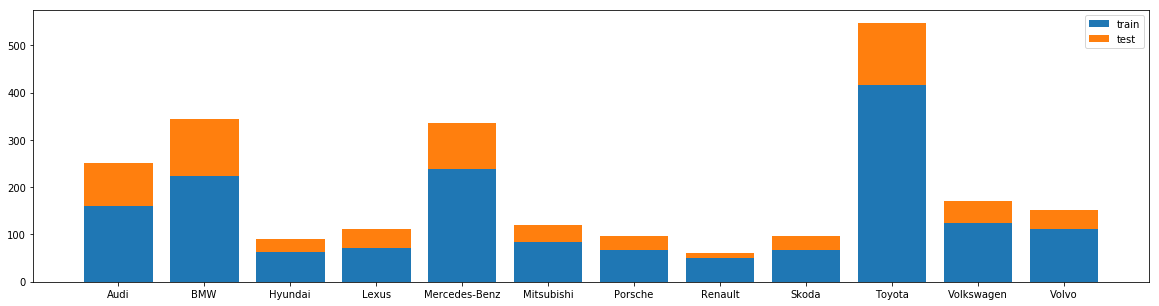

In [662]:
plt.figure(figsize=(20,5))
plt.bar(brand, counts, label="train")
plt.bar(brand2, counts2, bottom=counts, label="test")
plt.legend()
plt.show()

In [663]:
xlabels

['C', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

In [664]:
for c in xlabels:
    print(c, sorted(train_data[c].unique()))

C [1, 2]
P1 [1, 2, 3, 4, 5]
P2 [1, 2, 3, 4, 5]
P3 [1, 2, 3, 4, 5]
P4 [1, 2, 3, 4, 5]
P5 [1, 2, 3, 4, 5]
P6 [1, 2]
P7 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [665]:
train_data["Brand"] = pd.Categorical(train_data["Brand"])
test_data["Brand"] = pd.Categorical(test_data["Brand"])
train_data["Model"] = pd.Categorical(train_data["Model"])
test_data["Model"] = pd.Categorical(test_data["Model"])

In [837]:
def is_super_duper(s):
    if s.find("premium") >= 0:
        return 1
    if s.find("prestige")>=0:
        return 1
    if s.find("executive") >= 0:
        return 1
    if s.find("business") >= 0 or s.find("buisness") >=0:
        return 1
    if s.find("luxury") >= 0:
        return 1
    return 0
    pass
mean = merged_train["P7"].mean()
std = merged_train["P7"].std()

mean_hp = merged_train["hp (лошадиные силы)"].mean()
std_hp = merged_train["hp (лошадиные силы)"].std()

mean_et = merged_train['engine_type'].mean()
std_et = merged_train['engine_type'].std()

def prepare_data(df):
    return pd.concat([
        df[xlabels[:-1]],
        df["Brand"],
        df["Model"],
        df["Model"].apply(lambda x: x.split(' ')[0]), 
        df["Complectation"].apply(lambda x: x.lower().find("sport") >= 0 or x.lower().find("active") >= 0),
        df["Complectation"].apply(lambda x: x.lower().find("comfort") >= 0),
        df["Complectation"].apply(lambda x: is_super_duper(x.lower())),
        df['Тип кузова'],
        #df['Photo_filename'],
        #df['Страна-производитель'],
        #df['engine_type'],
        #df['engine'].apply(lambda x: x.find("T") >=0 ), #turbo
        df['engine'].apply(lambda x: 'F' if x.find('F')>=0 else 'D'),
        df['gearbox'],
        #df['коробка передач'],
        #df["Привод"],
        #df['engine_type'].apply(lambda x: (x - mean_et)/std_et).fillna(0),
        df["hp (лошадиные силы)"].apply(lambda x: (x-mean_hp)/std_hp),
        df["P7"].apply(lambda x: (x-mean)/std)
        #engine	gearbox	Тип кузова	hp (лошадиные силы)
    ], axis=1)
    pass

xtrain_prepared = prepare_data(xtrain)
xtest_prepared = prepare_data(xtest)
train_prepared = prepare_data(train_data)
test_prep = prepare_data(test_data)

In [838]:
import catboost
from catboost import CatBoostClassifier, CatBoostRegressor
train_prepared
#np.unique(test_prep['engine'])
#train_data.head()

,C,P1,P2,P3,P4,P5,P6,Brand,Model,Model,Complectation,Complectation,Complectation,Тип кузова,engine,gearbox,hp (лошадиные силы),P7
0,2,3,3,3,3,2,1,Toyota,Highlander,Highlander,False,False,0,SUV,F,AT,-0.006403,1.023877
1,2,2,2,2,4,1,1,BMW,5 Series Sedan,5,False,False,0,Sedan,F,AMT,0.796639,-1.442374
2,1,1,2,1,2,1,1,Hyundai,Santa Fe Premium,Santa,False,True,1,SUV,F,AT,-0.694724,1.517127
3,2,3,3,3,3,1,1,BMW,5 Series Sedan,5,False,False,0,Sedan,F,AMT,-0.580003,-1.072436
4,1,1,3,2,3,1,2,Volvo,XC90,XC90,False,False,0,SUV,F,AT,0.620146,0.160689
5,1,5,5,5,2,3,1,Volkswagen,Jetta,Jetta,False,False,0,Sedan,F,DSG,-0.880041,0.530626
6,2,2,2,3,3,4,1,Mitsubishi,Pajero Sport,Pajero,True,False,0,SUV,D,AT,-0.606477,-1.195749
7,1,4,2,4,4,3,2,Lexus,NX,NX,False,False,0,SUV,F,CVT,-0.880041,-1.319062
8,2,2,2,2,4,3,2,Toyota,Land Cruiser 200,Land,False,False,1,SUV,D,AT,0.523075,-0.825811
9,1,4,4,1,1,1,1,Skoda,Rapid,Rapid,False,False,0,Sedan,F,AT,-1.233026,1.023877


In [839]:
cat_columns = np.arange(xtrain_prepared.shape[1]-2)
test_classifiers = {}
classifiers = {}
for i in ycolumns:
    cb = CatBoostRegressor()
    cb.fit(xtrain_prepared, xtrain[i], cat_features=cat_columns)
    test_classifiers[i] = cb
    cb = CatBoostRegressor()
    cb.fit(train_prepared, train_data[i], cat_features=cat_columns)
    classifiers[i] = cb

In [840]:
predictions = {}
mae = 0
for i in ycolumns:
    predictions[i] = test_classifiers[i].predict(xtest_prepared)#[:, 1]
    mae += (sum(abs(predictions[i] - xtest[i])))
mae/ (len(ycolumns)*xtest.shape[0])

0.1492639165303603

In [841]:
predictions_ = {}
#mae = 0
for i in ycolumns:
    predictions_[i] = classifiers[i].predict(test_prep)#[:, 1]
    #mae += (sum(abs(predictions[i] - xtest[i])))
#mae/ (len(ycolumns)*xtest.shape[0])

In [842]:
train_data.index

RangeIndex(start=0, stop=1676, step=1)

In [843]:
with open("attempt19.csv", 'w') as f:
    f.write("ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18\n")
    for i, x in enumerate(test_data["ID"].values):
        row = [str(i)]
        for c in "X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18".split(','):
            row.append(str(predictions_[c][i]))
        f.write(",".join(row)+"\n")

In [844]:
import pickle
with open("catboost_models.pkl", 'wb') as f:
    pickle.dump( classifiers, f)

In [845]:
pcolumns = ["P"+i for i in ycolumns]

In [853]:
train_predictions = {"ID": np.arange(train_prepared.shape[0])}
test_predictions = {"ID": np.arange(test_prep.shape[0])}

for i in ycolumns:
    #cb = CatBoostRegressor()
    #cb.fit(xtrain_prepared, xtrain[i], cat_features=cat_columns)
    #test_classifiers[i] = cb
    #cb = CatBoostRegressor()
    #cb.fit(train_prepared, train_data[i], cat_features=cat_columns)
    #classifiers[i] = cb
    print("P"+i)
    train_px = classifiers[i].predict(train_prepared)
    train_predictions[i] = train_px
    test_px = classifiers[i].predict(test_prep)
    test_predictions[i] = test_px
    #print(px.shape)

PX1
PX2
PX3
PX4
PX5
PX6
PX7
PX8
PX9
PX10
PX11
PX12
PX13
PX14
PX15
PX16
PX17
PX18


In [854]:
train_predictions = pd.DataFrame(train_predictions)
test_predictions = pd.DataFrame(test_predictions)

In [855]:
train_data[xcolumns].to_csv("train_x.csv", index=False)
test_data[xcolumns].to_csv("train_x.csv", index=False)

train_data[ycolumns].to_csv("train_true.csv", index=False)
train_predictions.to_csv("train_predictions.csv", index=False)
test_predictions.to_csv("test_predictions.csv", index=False)

In [948]:
model_columns = np.unique(
    np.concatenate([
    np.unique(train_prepared.iloc[:, len(xlabels)+1]),
    np.unique(test_prep.iloc[:, len(xlabels)+1])]))
model_columns

array(['1', '3', '4', '5', '6', '7', '718', '911', 'A', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'ASX', 'B', 'C', 'CLA', 'CLS', 'Camry',
       'Cayenne', 'Corolla', 'Creta', 'Duster', 'E', 'ES', 'Elantra',
       'Fortuner', 'GLA', 'GLC', 'GLE', 'GLS', 'GS', 'GT', 'GX',
       'Highlander', 'Hilux', 'Jetta', 'Kaptur', 'Kodiaq', 'Koleos',
       'L200', 'LC', 'LS', 'LX', 'Land', 'Logan', 'Macan', 'NX',
       'Octavia', 'Outlander', 'Pajero', 'Panamera', 'Passat', 'Polo',
       'Q3', 'Q5', 'Q7', 'R8', 'RAV4', 'RS6', 'Rapid', 'S', 'S5', 'S6',
       'S60', 'S8', 'S90', 'Sandero', 'Santa', 'Solaris', 'Sonata',
       'Superb', 'TT', 'Tiguan', 'Touareg', 'Tucson', 'V40', 'V60', 'V90',
       'X1', 'X3', 'X4', 'X5', 'X6', 'XC60', 'XC90'], dtype=object)

In [949]:
#pd.concat([pd.get_dummies(train_prepared[x]) for x in list(train_prepared)[:-2]], axis=1) 
train_cat = pd.concat([
    pd.get_dummies(train_prepared.iloc[:, i])
for i, x in enumerate(xlabels)] + [
    pd.get_dummies(pd.Categorical(
        train_prepared.iloc[:, len(xlabels)+1],  categories = model_columns))
] + [train_prepared.iloc[:, len(xlabels)+2: len(xlabels)+5]] + [
    pd.get_dummies(train_prepared.iloc[:, len(xlabels)+5]),
    pd.get_dummies(train_prepared.iloc[:, len(xlabels)+6]),
    pd.get_dummies(train_prepared.iloc[:, len(xlabels)+7])
] + [train_prepared.iloc[:, -2:]], axis=1)

test_cat = pd.concat([
    pd.get_dummies(test_prep.iloc[:, i])
for i, x in enumerate(xlabels)]+ [
    pd.get_dummies(pd.Categorical(
        test_prep.iloc[:, len(xlabels)+1], categories = model_columns))
] + [test_prep.iloc[:, len(xlabels)+2: len(xlabels)+5]] + [
    pd.get_dummies(test_prep.iloc[:, len(xlabels)+5]),
    pd.get_dummies(test_prep.iloc[:, len(xlabels)+6]),
    pd.get_dummies(test_prep.iloc[:, len(xlabels)+7])
] +[test_prep.iloc[:, -2:]], axis=1)
    
    #pd.get_dummies(train_prepared[x])
#list(train_prepared)[:-2]
#list(train_prepared)[:-2]


In [990]:
test_cat.shape, train_cat.shape
train_cat.to_csv("train_cat.csv", index=False)
test_cat.to_csv("test_cat.csv", index=False)
input_size2

151

In [995]:
from keras.layers import Embedding, Activation, Input, Dense, merge, BatchNormalization, LSTM
from keras.layers.merge import Dot, Add, Concatenate, multiply


def stackedUnit(size1, size2, input_tensor, n=3, activation_type='sigmoid'):
    DBA = lambda size, input_tensor, activation_type: Activation(activation_type)(
            BatchNormalization()(
                Dense(size)(input_tensor))) 
        
    def nonLinearUnit(size, input_tensor, activation_type): 
        u1 = DBA(size, input_tensor, activation_type)
        return Add()([
            u1, 
            DBA(size, u1, activation_type)
        ])
    
    u0 = nonLinearUnit(size1, input_tensor, activation_type)
    for i in range(1, n):
        u0 = nonLinearUnit(size1, u0, activation_type)
    u0 = DBA(size2, u0, "sigmoid")
    return u0

In [1052]:
from keras.layers import Input, Dense, Dot, Add, Concatenate
from keras.models import Model
from keras import regularizers
import keras.backend as K

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_size=len(ycolumns)
input_size2 = train_cat.shape[1]
# this is our input placeholder
input_img = Input(shape=(input_size,))

helper_input = Input(shape=(input_size2,))
cinput = Concatenate()([helper_input, input_img])
attn = stackedUnit(500, 200, cinput, n=3, activation_type='tanh')
#attn = Dense(64, activation="sigmoid")(attn)

#encoded = Dense(32, activation='relu')(input_img)
#encoded = Dense(64, activation='relu')(encoded)
#encoded = Dense(64, activation='softmax')(encoded)
#encoded = Dot(axes=1)([encoded, attn])


#decoded = Dense(128, activation='relu')(encoded)
#decoded = Dense(32, activation='sigmoid')(encoded)
decoded = Dense(input_size, activation='sigmoid')(attn)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=[input_img, helper_input], outputs=decoded)
autoencoder.compile(optimizer="adadelta", loss="mean_absolute_error")
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_63 (InputLayer)           (None, 151)          0                                            
__________________________________________________________________________________________________
input_62 (InputLayer)           (None, 18)           0                                            
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 169)          0           input_63[0][0]                   
                                                                 input_62[0][0]                   
__________________________________________________________________________________________________
dense_213 (Dense)               (None, 500)          85000       concatenate_4[0][0]              
__________

In [1053]:
np.concatenate([
    train_predictions[ycolumns].values, 
    train_data[ycolumns].values
]).shape

(3352, 18)

In [1054]:
reference = pd.read_csv("reference_test.csv")

In [1055]:
autoencoder.fit([
    np.concatenate([
        train_predictions[ycolumns].values#,
        #reference[ycolumns].values
    ]+[train_data[ycolumns].values]*0), 
    np.concatenate([
        train_cat.values#, test_cat.values
    ]+[
        #train_cat.values,
        train_cat.values
    ]*0)
], np.concatenate([
    train_data[ycolumns].values#,
    #reference[ycolumns].values
]+[ 
    #train_data[ycolumns].values,
    train_data[ycolumns].values
]*0),verbose=2,
               epochs=50,
                batch_size=256,
                shuffle=True,  
    validation_data=[
        [reference[ycolumns].values, test_cat.values],
         reference[ycolumns].values,
    ])

Train on 1676 samples, validate on 700 samples
Epoch 1/50
 - 2s - loss: 0.1953 - val_loss: 0.0958
Epoch 2/50
 - 0s - loss: 0.1716 - val_loss: 0.0752
Epoch 3/50
 - 0s - loss: 0.1591 - val_loss: 0.0639
Epoch 4/50
 - 0s - loss: 0.1521 - val_loss: 0.0582
Epoch 5/50
 - 0s - loss: 0.1480 - val_loss: 0.0576
Epoch 6/50
 - 0s - loss: 0.1452 - val_loss: 0.0596
Epoch 7/50
 - 0s - loss: 0.1426 - val_loss: 0.0557
Epoch 8/50
 - 0s - loss: 0.1404 - val_loss: 0.0569
Epoch 9/50
 - 0s - loss: 0.1384 - val_loss: 0.0571
Epoch 10/50
 - 0s - loss: 0.1363 - val_loss: 0.0576
Epoch 11/50
 - 0s - loss: 0.1343 - val_loss: 0.0616
Epoch 12/50
 - 0s - loss: 0.1324 - val_loss: 0.0558
Epoch 13/50
 - 0s - loss: 0.1304 - val_loss: 0.0610
Epoch 14/50
 - 0s - loss: 0.1281 - val_loss: 0.0583
Epoch 15/50
 - 0s - loss: 0.1262 - val_loss: 0.0612
Epoch 16/50
 - 0s - loss: 0.1236 - val_loss: 0.0575
Epoch 17/50
 - 0s - loss: 0.1222 - val_loss: 0.0582
Epoch 18/50
 - 0s - loss: 0.1210 - val_loss: 0.0538
Epoch 19/50
 - 0s - loss: 

In [1056]:
fixed_prediction = pd.concat([
   pd.DataFrame({"ID": test_predictions["ID"].astype(str)}), 
pd.DataFrame(autoencoder.predict([test_predictions[ycolumns].values, test_cat.values]), columns=ycolumns)], axis=1)
fixed_prediction.to_csv("autoencoded_predictions.csv", index=False)

In [1057]:
fixed_prediction2 = pd.concat([
pd.DataFrame({"ID": test_predictions["ID"].astype(str)}), 
(fixed_prediction[ycolumns]*1+1*reference[ycolumns])/2.0
], axis=1)
fixed_prediction2.to_csv("subm.csv", index=False)

In [1048]:
fixed_prediction2 = pd.concat([
   pd.DataFrame({"ID": test_predictions["ID"].astype(str)}), 
pd.DataFrame(autoencoder.predict([reference[ycolumns].values, test_cat.values]), columns=ycolumns)], axis=1)
fixed_prediction2.to_csv("autoencoded_predictions2.csv", index=False)

In [1049]:
pred = ((fixed_prediction+fixed_prediction2)[ycolumns].values +reference[ycolumns].values)/3.0

In [1050]:
from sklearn.metrics import mean_absolute_error as mae
i=0
while True:
    pred2 = autoencoder.predict([pred, test_cat.values])
    if mae(pred2, pred) < 0.00000001:
        break
    if i > 1000:
        break
    i+=1
    pred = pred2

In [1051]:
fixed_prediction3 = pd.concat([
   pd.DataFrame({"ID": test_predictions["ID"].astype(str)}), 
pd.DataFrame(autoencoder.predict([pred, test_cat.values]), columns=ycolumns)], axis=1)
fixed_prediction2.to_csv("autoencoded_predictions3.csv", index=False)

In [205]:
cars = pd.read_csv("data.csv")

In [209]:
brands = np.unique(train_data["Brand"])

In [219]:
cars_make = np.unique(cars["Make"])

In [225]:
def check_series(brand, cars, train):
    print(cars)
    pass

In [226]:
for b in brands: 
    if not b in cars_make:
        print(b)
    else:
        check_series(b, cars, train_data[train_data["Brand"]==b])

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
5          BMW    1 Series  2012     premium unleaded (required)      230.0   
6          BMW    1 Series  2012     premium unleaded (required)      300.0   
7          BMW    1 Series  2012     premium unleaded (required)      300.0   
8          BMW    1 Series  2012     premium unleaded (required)      230.0   
9          BMW    1 Series  2013     premium unleaded (required)      230.0   
10         BMW    1 Series  2013     premium unleaded (required)      300.0   
11         BMW    1 Series  2013     premium unleade

In [222]:
cars_make

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Lotus', 'Maserati', 'Maybach', 'Mazda', 'McLaren',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Porsche', 'Rolls-Royce', 'Saab', 'Scion', 'Spyker',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

In [230]:
np.unique(cars[cars["Make"]=="BMW"]["Model"])

array(['1 Series', '1 Series M', '2 Series', '3 Series',
       '3 Series Gran Turismo', '4 Series', '4 Series Gran Coupe',
       '5 Series', '5 Series Gran Turismo', '6 Series',
       '6 Series Gran Coupe', '7 Series', '8 Series',
       'ALPINA B6 Gran Coupe', 'ALPINA B7', 'ActiveHybrid 5',
       'ActiveHybrid 7', 'ActiveHybrid X6', 'Alpina', 'M', 'M2', 'M3',
       'M4', 'M4 GTS', 'M5', 'M6', 'M6 Gran Coupe', 'X1', 'X3', 'X4',
       'X5', 'X5 M', 'X6', 'X6 M', 'Z3', 'Z4', 'Z4 M', 'Z8', 'i3'],
      dtype=object)

In [246]:
np.unique(train_data[train_data["Brand"]=="BMW"]["Model"])

array(['1 Series 5D', '3 GT', '3 Series Sedan', '4 Series',
       '4 Series Gran Coupe', '5 Series Sedan', '6 GT', '7 Series Sedan',
       'X1', 'X3', 'X4', 'X5', 'X5 M', 'X6', 'X6 M'], dtype=object)

In [236]:
!unzip vehicles.csv.zip

Archive:  vehicles.csv.zip
  inflating: vehicles.csv            


In [242]:
with open("autos.csv") as f:
    print(f.readline())
    print(f.readline())
    print(f.readline())
    print(f.readline())


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdc in position 732: invalid continuation byte